In [2]:
#Importing req libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
#Importing keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

2023-06-05 22:01:42.881385: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-05 22:01:43.592489: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
np.random.seed(0)

#Loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

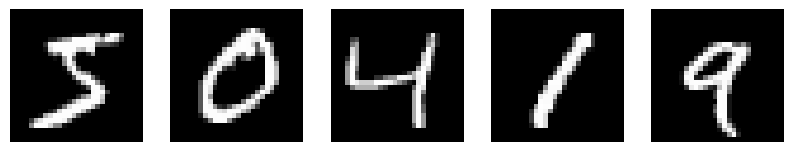

In [4]:
#plotting few random images as black and white
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [5]:
X_train.shape

(60000, 28, 28)

In [14]:

# Defining the model architecture
model = Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        # Convolutional layer with 32 filters of size 3x3, using ReLU activation function.
        # Input shape: (28, 28, 1) corresponds to 28x28 grayscale images.

        MaxPool2D((2, 2)),
        # Max pooling layer with pool size 2x2.
        # Reduces the spatial dimensions by taking the maximum value within each 2x2 window.

        Conv2D(64, (3, 3), activation='relu'),
        # Convolutional layer with 64 filters of size 3x3, using ReLU activation function.

        MaxPool2D((2, 2)),
        # Max pooling layer with pool size 2x2.

        Flatten(),
        # Flattens the input from 2D to a 1D array.
        # Necessary before passing the data to a fully connected layer.

        Dense(64, activation='relu'),
        # Fully connected layer with 64 neurons and ReLU activation function.

        Dense(32, activation='relu'),
        # Fully connected layer with 32 neurons and ReLU activation function.

        Dense(10, activation='softmax')
        # Output layer with 10 neurons (corresponding to 10 classes) and softmax activation function.
        # Softmax outputs probabilities for each class, indicating the model's confidence.
    ]
)

# Compiling the model
model.compile(optimizer=Adam(lr=0.04), loss='categorical_crossentropy', metrics=['accuracy'])
# Adam optimizer with learning rate 0.04.
# Categorical cross-entropy loss function is used for multi-class classification.
# Accuracy metric is calculated during training and evaluation.

# Printing the model summary
model.summary()
# Displays a summary of the model architecture, including the number of parameters in each layer,
# as well as the total number of trainable parameters.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [15]:
from keras.callbacks import TensorBoard
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
model.fit(X_train.reshape(-1,28,28,1), to_categorical(y_train), epochs=10, validation_split=0.2,callbacks=[TensorBoard('CNN_logs')])

Epoch 1/10
1200/1200 [==============================] - 22s 18ms/step - loss: 0.3826 - accuracy: 0.9196 - val_loss: 0.0974 - val_accuracy: 0.9721
Epoch 2/10
1200/1200 [==============================] - 21s 18ms/step - loss: 0.0795 - accuracy: 0.9765 - val_loss: 0.0816 - val_accuracy: 0.9778
Epoch 3/10
1200/1200 [==============================] - 21s 17ms/step - loss: 0.0581 - accuracy: 0.9821 - val_loss: 0.0664 - val_accuracy: 0.9804
Epoch 4/10
1200/1200 [==============================] - 21s 18ms/step - loss: 0.0490 - accuracy: 0.9853 - val_loss: 0.0587 - val_accuracy: 0.9837
Epoch 5/10
1200/1200 [==============================] - 16s 14ms/step - loss: 0.0414 - accuracy: 0.9870 - val_loss: 0.0546 - val_accuracy: 0.9852
Epoch 6/10
1200/1200 [==============================] - 18s 15ms/step - loss: 0.0372 - accuracy: 0.9883 - val_loss: 0.0489 - val_accuracy: 0.9861
Epoch 7/10
1200/1200 [==============================] - 22s 18ms/step - loss: 0.0316 - accuracy: 0.9897 - val_loss: 0.0862 -

In [11]:
model.evaluate(X_test.reshape(-1,28,28,1), to_categorical(y_test))

313/313 [==============================] - 2s 5ms/step - loss: 0.0803 - accuracy: 0.9840


[0.08032990992069244, 0.984000027179718]

In [10]:
#confusion matrix
y_pred = model.predict(X_test.reshape(-1,28,28,1))
y_pred = np.argmax(y_pred, axis=1)
y_pred


313/313 [==============================] - 1s 5ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [12]:
print(confusion_matrix(y_test, y_pred))

[[ 975    1    1    0    1    0    0    1    1    0]
 [   0 1130    0    2    0    0    0    2    1    0]
 [   1    2 1003    1    0    0    0   24    1    0]
 [   0    0    0 1006    0    0    0    3    1    0]
 [   1    0    2    0  943    0    0    6    2   28]
 [   2    0    0   11    0  873    1    2    0    3]
 [   4    5    1    0    3    6  938    0    1    0]
 [   0    2    0    1    1    0    0 1022    1    1]
 [   3    0    0    2    2    1    0    3  957    6]
 [   0    0    0    1    6    2    0    5    2  993]]


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.97      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.96      0.97       982
           5       0.99      0.98      0.98       892
           6       1.00      0.98      0.99       958
           7       0.96      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

